In [186]:
import pandas as pd

In [187]:
dados = pd.read_csv('bikes.csv')

In [188]:
dados.head (  )

,weathersit,temp,cnt
0,2,0.344167,985
1,2,0.363478,801
2,1,0.196364,1349
3,1,0.200000,1562
4,1,0.226957,1600


In [189]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'temperatura')

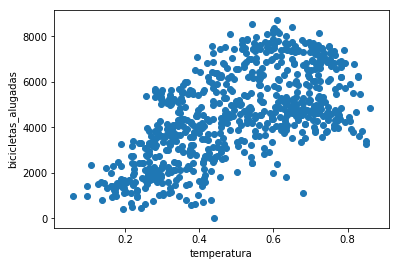

In [190]:
plt.scatter(dados['temp'],dados['cnt'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')

In [191]:
dados.shape

(731, 3)

([<matplotlib.axis.XTick at 0x211da051c50>,
 <a list of 3 Text xticklabel objects>)

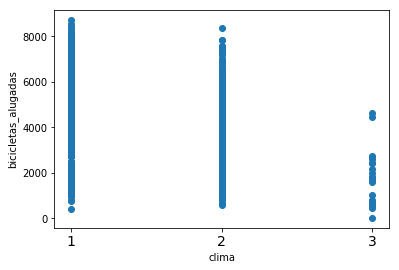

In [192]:
plt.scatter(dados['weathersit'],dados['cnt'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
indice=[1,2,3]
plt.xticks(indice,fontsize=14)

In [193]:
import numpy as np

In [194]:
y = dados['cnt'].values

In [195]:
y

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2077, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425,
       1536, 1685, 2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455,
       2895, 3348, 2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944,
       4189, 1683, 4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351,
       4401, 4451, 2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864,
       4105, 3409, 4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274,
       4492, 4978, 4677, 4679, 4758, 4788, 4098, 39

In [196]:
x = dados[['weathersit','temp']].values
print ( x )

[[2.       0.344167]
 [2.       0.363478]
 [1.       0.196364]
 ...
 [2.       0.253333]
 [1.       0.255833]
 [2.       0.215833]]


In [197]:
xmax = np.amax ( x , axis = 0 )

X = x / xmax

In [198]:
print ( X )

[[0.66666667 0.39941996]
 [0.66666667 0.42183117]
 [0.33333333 0.2278885 ]
 ...
 [0.66666667 0.29400337]
 [0.33333333 0.29690472]
 [0.66666667 0.25048308]]


In [199]:
ymax = np.amax ( y , axis = 0 )
Y = y / ymax

In [200]:
print ( Y )

[0.11303649 0.09192105 0.15480835 0.17925178 0.18361258 0.18430112
 0.17328437 0.11005279 0.09433096 0.15159513 0.14493918 0.13334863
 0.16134955 0.16307092 0.14321781 0.13816846 0.11475786 0.07837962
 0.18935047 0.2211384  0.17707138 0.11257746 0.11315125 0.16249713
 0.22779435 0.05806748 0.04946064 0.13392242 0.12600413 0.12577462
 0.17225155 0.15607069 0.1751205  0.17787468 0.19600643 0.11533165
 0.18625201 0.19646546 0.17557953 0.18418637 0.17649759 0.20036723
 0.16892357 0.18235024 0.21953179 0.20828552 0.24271288 0.28402571
 0.33589626 0.1876291  0.20794124 0.12703695 0.1663989  0.21999082
 0.20736745 0.16766123 0.22595823 0.27564838 0.16593987 0.2124168
 0.24489328 0.193367   0.22308928 0.23835208 0.06942851 0.21482672
 0.24477852 0.21700711 0.07149415 0.22687629 0.24466376 0.27736975
 0.23479458 0.23594216 0.25154923 0.31489557 0.37170071 0.35770025
 0.28356667 0.23835208 0.3101905  0.24340142 0.21402341 0.25361487
 0.28643562 0.19428506 0.23272894 0.27828781 0.17626807 0.19336

In [201]:
def sigmoid ( soma ):
    return 1 / ( 1 + np.exp ( -soma ) )
    

In [202]:
def relu ( soma ):
    return np.maximum ( 0, soma )

In [203]:
arquitetura = [
    { "dim_entrada":2, "dim_saida":3, "ativacao":"relu" },
    { "dim_entrada":3, "dim_saida":1, "ativacao":"sigmoid" }
]

In [204]:
def inicia_camadas ( arquitetura, seed = 99 ):
    
    np.random.seed ( seed )
    
    numero_de_camadas = len ( arquitetura ) 
    
    valores_parametros = {}
    
    for indice, camada in enumerate ( arquitetura ):
        
        indice_camada = indice + 1
        
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida = camada["dim_saida"]
        
        valores_parametros [ 'P' + str ( indice_camada ) ] = np.random.randn( tamanho_camada_saida, tamanho_camada_entrada )
                              
        valores_parametros [ 'b' + str ( indice_camada ) ] = np.random.randn ( tamanho_camada_saida, 1 ) * 0.1

    return valores_parametros
    

In [205]:
inicia_camadas ( arquitetura )

{'P1': array([[-0.14235884,  2.05722174],
        [ 0.28326194,  1.32981198],
        [-0.15462185, -0.06903086]]), 'b1': array([[ 0.07551805],
        [ 0.08256466],
        [-0.01130692]]), 'P2': array([[-2.36783759, -0.16704943,  0.68539797]]), 'b2': array([[0.00235001]])}

In [206]:
def propaga_uma_camada ( Ativado_anterior, 
                        Pessos_atual, b_atual, 
                        ativacao = "relu" ):
    
    Saida_atual = np.dot(Pessos_atual,
                         Ativado_anterior) + b_atual
    
    func_ativacao = relu
    
    if ativacao is "sigmoid":
        func_ativacao = sigmoid
        
    return func_ativacao(Saida_atual), Saida_atual


In [207]:
def propaga_total ( X, valores_parametros, arquitetura ):
    
    memoria = {}
    
    Ativado_atual = X
    
    for indice, camada in enumerate ( arquitetura ):
        
        indice_camada = indice + 1
        
        Ativado_anterior = Ativado_atual
        
        func_ativacao_atual = camada["ativacao"]
        
        Pesos_atual = valores_parametros ["P" + str ( indice_camada ) ]
        
        b_atual = valores_parametros["b" + str ( indice_camada ) ]
        
        Ativado_atual, Saida_atual = propaga_uma_camada ( Ativado_anterior, 
                Pesos_atual, b_atual, func_ativacao_atual )
        
        memoria["A" + str ( indice ) ] = Ativado_anterior
        
        memoria["Z" + str ( indice_camada ) ] = Saida_atual
    
    return Ativado_atual, memoria   
    
    

In [208]:
valores_parametros = inicia_camadas ( arquitetura, seed = 99 )

In [209]:
y_estimado, memoria = propaga_total ( np.transpose ( X ), 
                    valores_parametros, arquitetura )

In [212]:
y_estimado[0,0]*ymax

1010.3020377615483

In [215]:
Y[0]*ymax

985.0000000000001